# Benin (Malanville) — EDA
This notebook performs profiling, cleaning and exploratory data analysis for the Benin (Malanville) dataset.

Instructions: Update `DATA_PATH` if needed to point at `data/benin-malanville.csv`. Do NOT commit any generated CSVs.

In [1]:
# Configuration
DATA_PATH = '../data/benin-malanville.csv'  # relative to notebook file; adjust if needed
CLEAN_OUT_PATH = '../data/benin_clean.csv'  # exported but do NOT commit
SAMPLE_ROWS = None  # set to an int to run on a sample for fast iteration

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [7]:
# Load data
df = pd.read_csv(DATA_PATH, parse_dates=[0], nrows=SAMPLE_ROWS)
# normalize column names (strip spaces/newlines)
df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('','')
df.rename(columns={df.columns[0]: 'Timestamp'}, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.set_index('Timestamp')
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary statistics & missing values

In [8]:
# Describe numeric columns
display(df.describe())
# Missing value counts and percent
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_report = pd.DataFrame({'missing_count': missing_counts, 'missing_pct': missing_pct})
display(missing_report.sort_values('missing_pct', ascending=False))
# Columns with >5% nulls
cols_gt5pct = missing_report[missing_report['missing_pct'] > 5].index.tolist()
print('Columns with >5% nulls:', cols_gt5pct)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


,missing_count,missing_pct
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


Columns with >5% nulls: ['Comments']


## Outlier detection (Z-score) & basic cleaning

In [9]:
from scipy.stats import zscore
cols_for_z = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
# make sure columns exist after name normalization
cols_for_z = [c for c in cols_for_z if c in df.columns]
z = df[cols_for_z].apply(lambda x: zscore(x, nan_policy='omit'))
outlier_mask = (z.abs() > 3)
# Flag rows with any outlier in these columns
df['outlier_flag'] = outlier_mask.any(axis=1)
print('Outlier counts per column:')
print(outlier_mask.sum())

Outlier counts per column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [10]:
# Impute median for key columns (GHI, DNI, DHI, ModA, ModB, WS, WSgust)
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
key_cols = [c for c in key_cols if c in df.columns]
for c in key_cols:
    median = df[c].median()
    df[c] = df[c].fillna(median)
# Add a cleaning flag: rows changed by imputation or outlier trimming?
df['cleaning_flag'] = df['outlier_flag'] | df[key_cols].isna().any(axis=1)
df['cleaning_flag'] = df['cleaning_flag'].astype(int)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_flag,cleaning_flag
Timestamp,,,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,False,0
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,False,0
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,False,0
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,False,0
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,False,0


## Time series plots (GHI, DNI, DHI, Tamb)

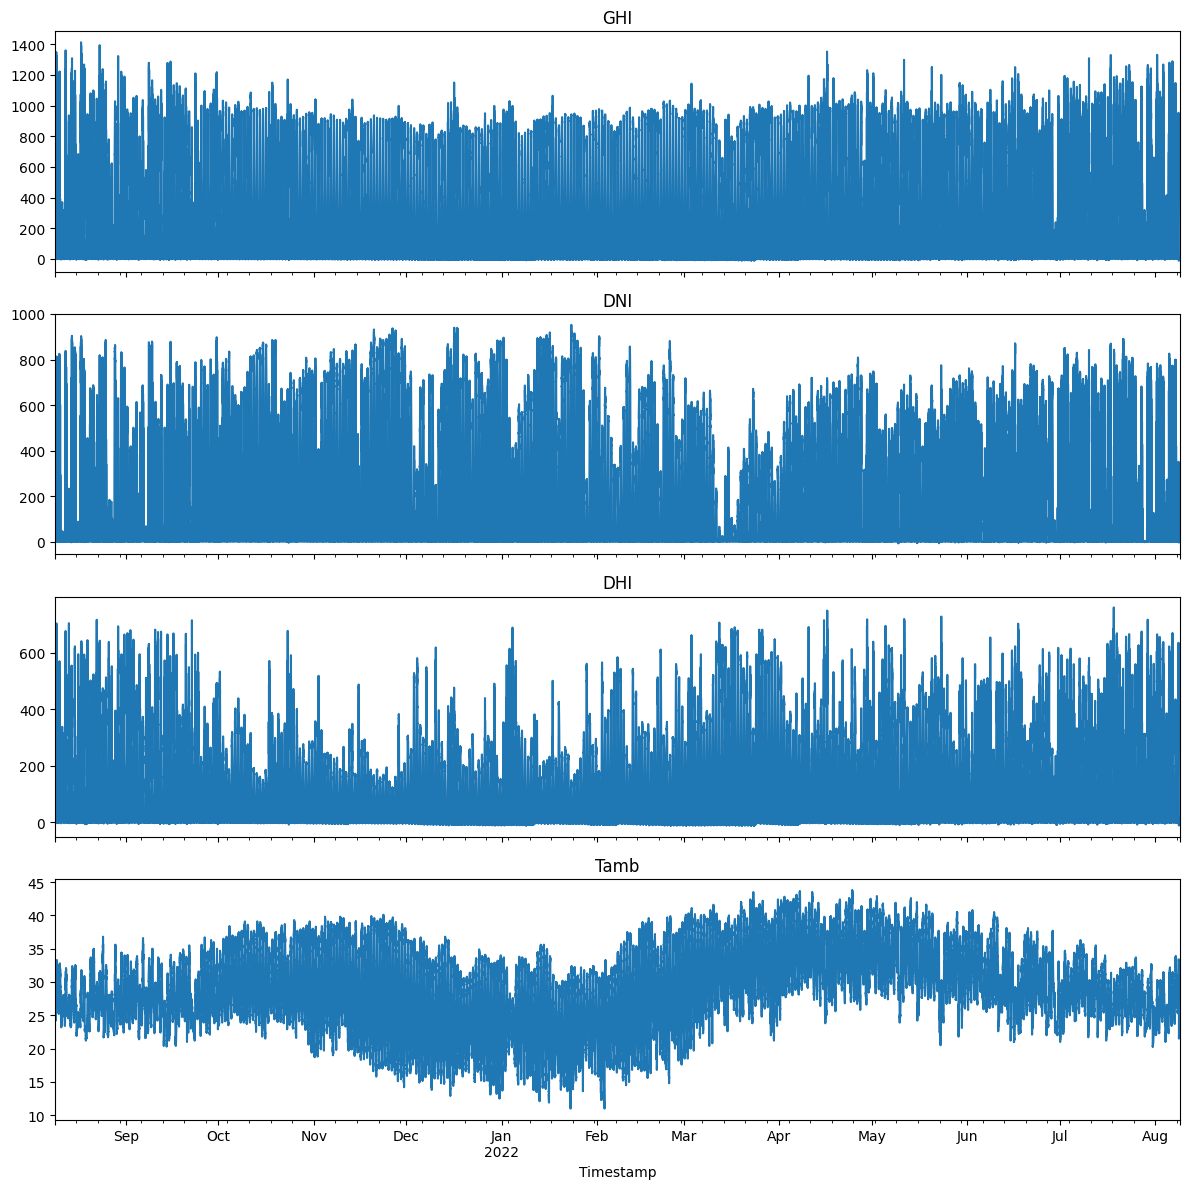

In [11]:
plot_cols = [c for c in ['GHI','DNI','DHI','Tamb'] if c in df.columns]
fig, axes = plt.subplots(len(plot_cols), 1, figsize=(12, 3*len(plot_cols)), sharex=True)
if len(plot_cols) == 1:
    axes = [axes]
for ax, col in zip(axes, plot_cols):
    df[col].plot(ax=ax, title=col)
plt.tight_layout()
plt.show()

## Cleaning impact: ModA & ModB pre/post-clean

In [12]:
for mod in ['ModA','ModB']:
    if mod in df.columns:
        display(df.groupby('cleaning_flag')[mod].mean())

cleaning_flag
0    232.393310
1    517.343618
Name: ModA, dtype: float64

cleaning_flag
0    225.026584
1    486.943256
Name: ModB, dtype: float64

## Correlation heatmap and scatter plots

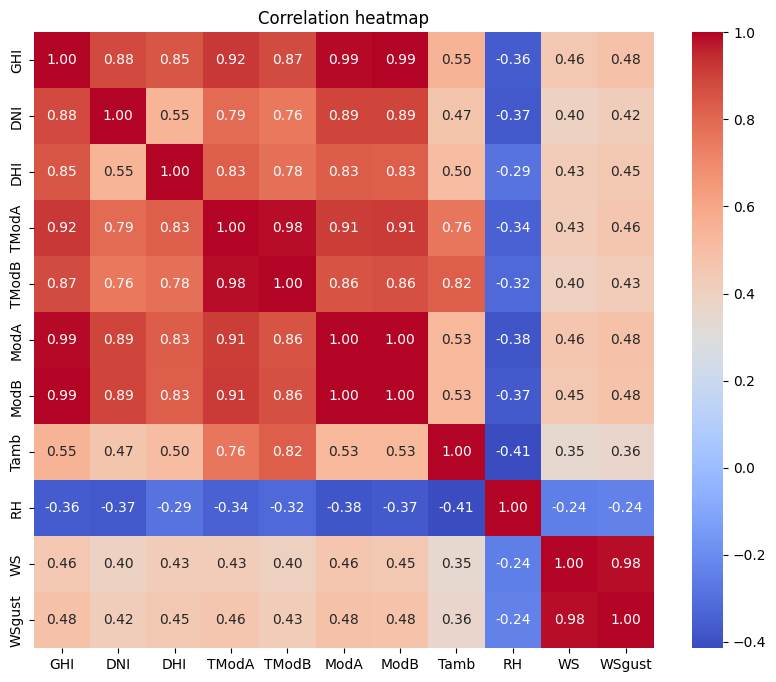

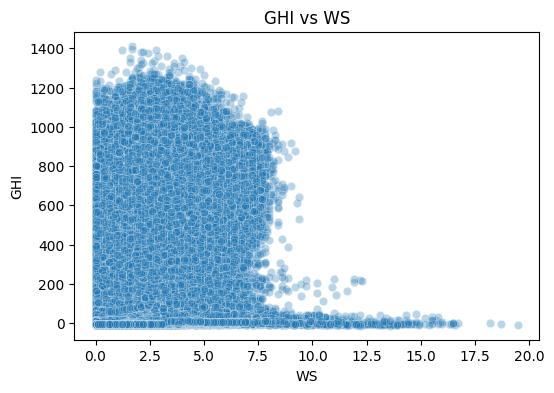

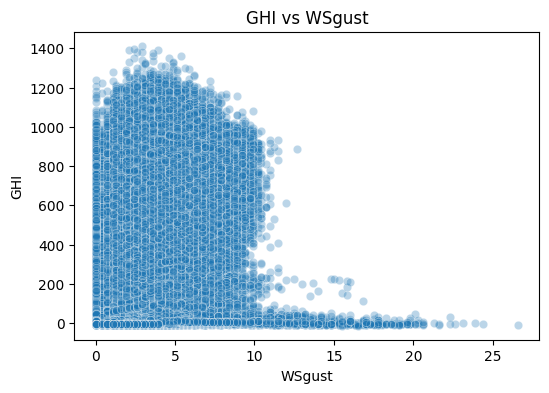

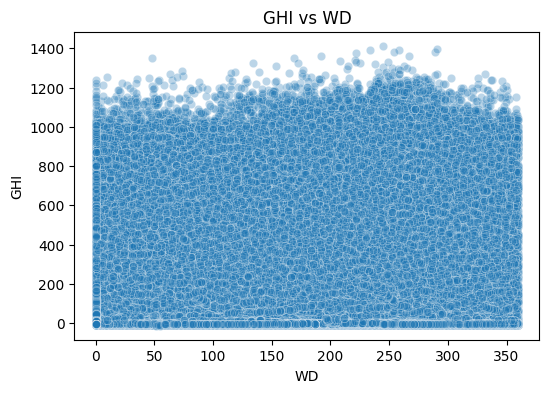

In [13]:
corr_cols = [c for c in ['GHI','DNI','DHI','TModA','TModB','ModA','ModB','Tamb','RH','WS','WSgust'] if c in df.columns]
if corr_cols:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation heatmap')
    plt.show()
# Scatter examples
for x in ['WS','WSgust','WD']:
    if x in df.columns and 'GHI' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=x, y='GHI', alpha=0.3)
        plt.title(f'GHI vs {x}')
        plt.show()

## Wind & distribution analysis

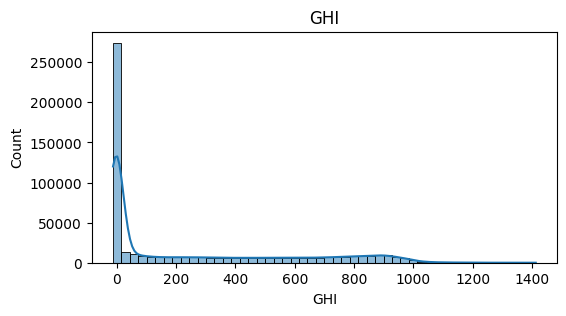

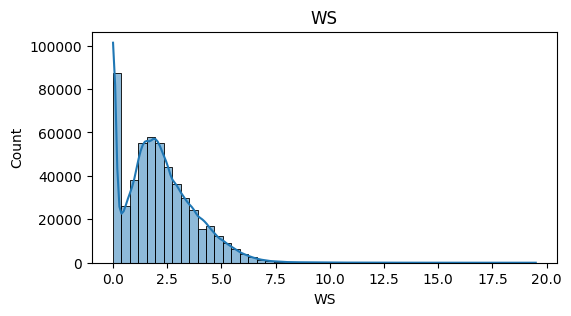

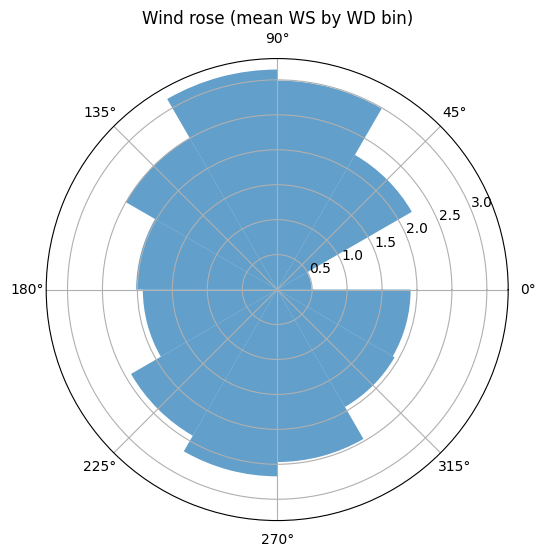

In [14]:
# Histogram for GHI and WS
for c in ['GHI','WS']:
    if c in df.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(df[c].dropna(), kde=True, bins=50)
        plt.title(c)
        plt.show()
# Simple wind rose-like polar plot using WD and WS (binned)
if 'WD' in df.columns and 'WS' in df.columns:
    wd = df['WD'].dropna()
    ws = df['WS'].dropna()
    # create bins
    bins = np.linspace(0, 360, 13)
    inds = np.digitize(wd % 360, bins)
    rose = [ws[inds==i].mean() for i in range(1,len(bins))]
    angles = np.deg2rad((bins[:-1] + bins[1:]) / 2)
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    ax.bar(angles, rose, width=np.diff(np.deg2rad(bins)), align='center', alpha=0.7)
    plt.title('Wind rose (mean WS by WD bin)')
    plt.show()

## Temperature & humidity analysis; Bubble chart

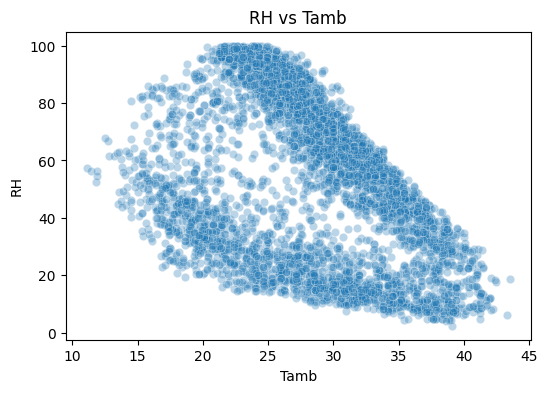

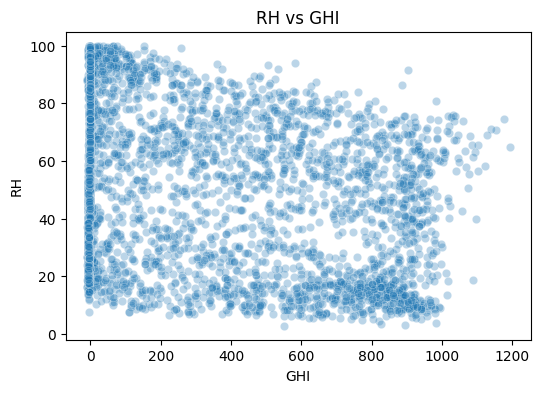

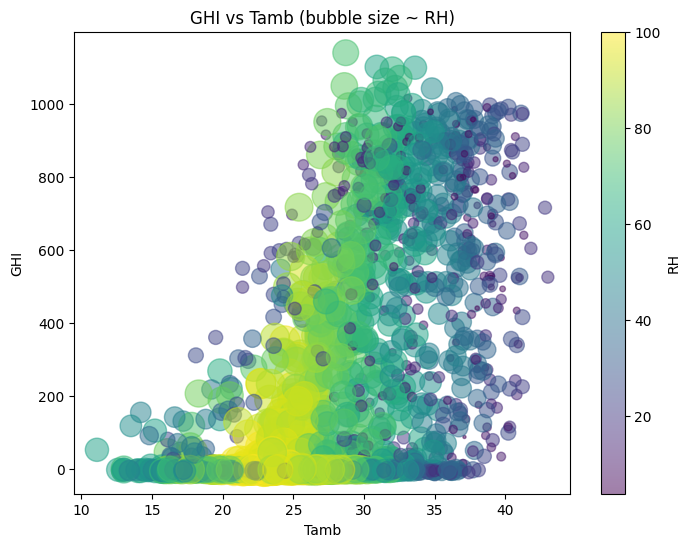

In [15]:
# RH vs Tamb and RH vs GHI
if 'RH' in df.columns and 'Tamb' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df.sample(min(5000, len(df))), x='Tamb', y='RH', alpha=0.3)
    plt.title('RH vs Tamb')
    plt.show()
if 'RH' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df.sample(min(5000, len(df))), x='GHI', y='RH', alpha=0.3)
    plt.title('RH vs GHI')
    plt.show()
# Bubble chart: GHI vs Tamb, bubble size = RH
if 'GHI' in df.columns and 'Tamb' in df.columns and 'RH' in df.columns:
    plt.figure(figsize=(8,6))
    sample = df.sample(min(2000, len(df)))
    sizes = (sample['RH'].fillna(sample['RH'].median()) - sample['RH'].min() + 1) * 5
    plt.scatter(sample['Tamb'], sample['GHI'], s=sizes, alpha=0.5, c=sample['RH'], cmap='viridis')
    plt.xlabel('Tamb')
    plt.ylabel('GHI')
    plt.title('GHI vs Tamb (bubble size ~ RH)')
    plt.colorbar(label='RH')
    plt.show()

In [16]:
# Export cleaned CSV (do NOT commit data/ to git)
df.to_csv(CLEAN_OUT_PATH, index=True)
print('Wrote cleaned CSV to', CLEAN_OUT_PATH)

Wrote cleaned CSV to ../data/benin_clean.csv
